
# **AE Corp**

**Company Introduction**

Your client for this project is a retail banking institution.

They are going to float a stock trading facility for their existing customers.
The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.

They will have to incentivize their customers to adopt their offerings.
One way to incentivize is to offer discounts on the commission for trading transactions.

**Current Scenario**

The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.

# **Problem Statement**

***The current process suffers from the following problems:***

One issue is that only about 10% of the customers do enough trades for earnings after discounts to be profitable.

The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

The marketing department has hired you as a data science consultant because they want to supplement their campaigns with a more proactive approach.

**Your Role**

You are given datasets of past customers and their status (Revenue Grid 1 or 2).
Your task is to build a classification model using the datasets.

Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

**Evaluation Metric**

The model evaluation will be based on the F1 Score score.

# **Data Description**

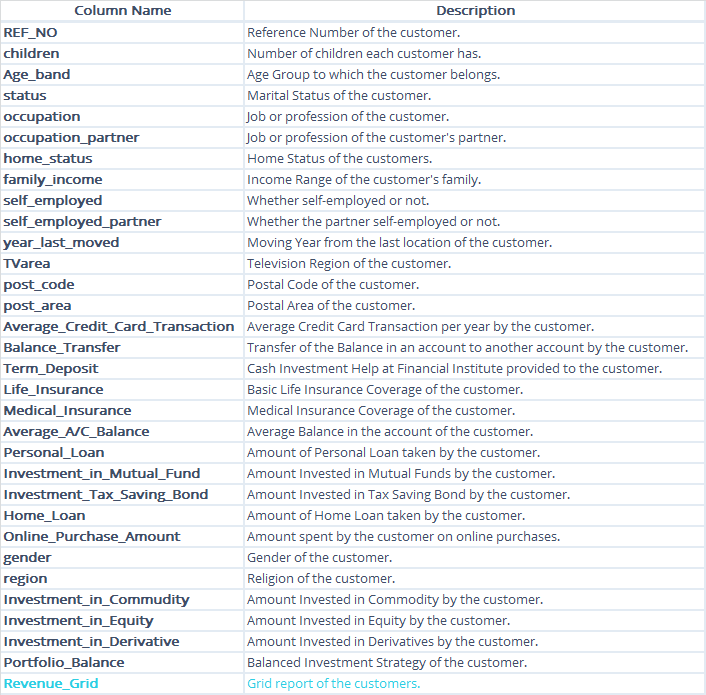

In [4]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/content/sample_data/existing_base_train.csv');

In [6]:
data.head(5)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [7]:
print(data.status.unique());

['Partner' 'Divorced/Separated' 'Single/Never Married' 'Widowed' 'Unknown']


In [8]:
data.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

  **No Missing values**


In [10]:
data.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


In [11]:
data_Dropped=data.copy()

In [12]:
data_Dropped.head(5)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [13]:
data_Dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [14]:
data_Dropped['investment'] = data_Dropped['Investment_in_Mutual_Fund'] + data_Dropped['Investment_Tax_Saving_Bond'] + data_Dropped['Investment_in_Commudity'] + data_Dropped['Investment_in_Equity'] + data_Dropped['Investment_in_Derivative']

In [15]:
data_Dropped['insurance']=data_Dropped['Life_Insurance'] + data_Dropped['Medical_Insurance']

In [16]:
data_Dropped['loan']=data_Dropped['Personal_Loan'] + data_Dropped['Home_Loan']

In [17]:
drop_cols = ['REF_NO','children','status','occupation', 'self_employed','self_employed_partner','Life_Insurance','Medical_Insurance','Personal_Loan','Home_Loan','occupation_partner', 'home_status','year_last_moved','TVarea', 'post_code', 'post_area', 'region','Investment_in_Mutual_Fund','Investment_Tax_Saving_Bond','Investment_in_Commudity','Investment_in_Equity','Investment_in_Derivative']
data_Dropped= data_Dropped.drop(drop_cols, axis = 1)
data_Dropped.head(5)

,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Online_Purchase_Amount,gender,Portfolio_Balance,Revenue_Grid,investment,insurance,loan
0,31-35,">=35,000",26.98,29.99,312.25,108.85,7.68,Female,360.37,2,512.69,388.51,230.87
1,45-50,">=35,000",35.98,74.48,0.00,48.45,18.99,Female,89.22,2,87.42,110.95,15.99
2,36-40,"<22,500, >=20,000",0.00,24.46,0.00,0.00,0.00,Female,14.50,2,25.61,18.44,0.02
3,31-35,"<25,000, >=22,500",44.99,0.00,0.00,0.00,0.00,Female,68.98,2,20.00,29.99,0.00
4,55-60,">=35,000",0.00,0.00,0.00,0.00,0.00,Female,1.88,2,13.30,0.00,0.00


In [18]:
data_Dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         8124 non-null   object 
 1   family_income                    8124 non-null   object 
 2   Average_Credit_Card_Transaction  8124 non-null   float64
 3   Balance_Transfer                 8124 non-null   float64
 4   Term_Deposit                     8124 non-null   float64
 5   Average_A/C_Balance              8124 non-null   float64
 6   Online_Purchase_Amount           8124 non-null   float64
 7   gender                           8124 non-null   object 
 8   Portfolio_Balance                8124 non-null   float64
 9   Revenue_Grid                     8124 non-null   int64  
 10  investment                       8124 non-null   float64
 11  insurance                        8124 non-null   float64
 12  loan                

In [19]:
data_Dropped['age_band'].value_counts()

45-50      1098
41-45       903
36-40       895
55-60       865
31-35       840
51-55       833
26-30       735
61-65       700
65-70       468
22-25       356
71+         337
18-21        50
Unknown      44
Name: age_band, dtype: int64

In [20]:
data_Dropped['family_income'].value_counts()

>=35,000             2014
<27,500, >=25,000     969
<30,000, >=27,500     796
<25,000, >=22,500     656
<12,500, >=10,000     535
<20,000, >=17,500     525
<17,500, >=15,000     521
<15,000, >=12,500     508
<22,500, >=20,000     479
<10,000, >= 8,000     452
< 8,000, >= 4,000     328
< 4,000               233
Unknown               108
Name: family_income, dtype: int64

In [21]:
for idx,name in enumerate(data_Dropped['family_income'].value_counts().index.tolist()):
    print('Name :', name)

Name : >=35,000
Name : <27,500, >=25,000
Name : <30,000, >=27,500
Name : <25,000, >=22,500
Name : <12,500, >=10,000
Name : <20,000, >=17,500
Name : <17,500, >=15,000
Name : <15,000, >=12,500
Name : <22,500, >=20,000
Name : <10,000, >= 8,000
Name : < 8,000, >= 4,000
Name : < 4,000
Name : Unknown


In [22]:
data_Dropped['family_income']=data_Dropped['family_income'].replace('Unknown', '>0')
data_Dropped['family_income']=data_Dropped['family_income'].replace('< 4,000', '<4,000')
data_Dropped['family_income']=data_Dropped['family_income'].replace('<10,000, >= 8,000', '<10,000, >=8,000')
data_Dropped['family_income']=data_Dropped['family_income'].replace('< 8,000, >= 4,000', '<8,000, >=4,000')

In [23]:
data_Dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         8124 non-null   object 
 1   family_income                    8124 non-null   object 
 2   Average_Credit_Card_Transaction  8124 non-null   float64
 3   Balance_Transfer                 8124 non-null   float64
 4   Term_Deposit                     8124 non-null   float64
 5   Average_A/C_Balance              8124 non-null   float64
 6   Online_Purchase_Amount           8124 non-null   float64
 7   gender                           8124 non-null   object 
 8   Portfolio_Balance                8124 non-null   float64
 9   Revenue_Grid                     8124 non-null   int64  
 10  investment                       8124 non-null   float64
 11  insurance                        8124 non-null   float64
 12  loan                

In [24]:

family_income_values=data_Dropped['family_income'].tolist()
print(family_income_values)

['>=35,000', '>=35,000', '<22,500, >=20,000', '<25,000, >=22,500', '>=35,000', '>=35,000', '<30,000, >=27,500', '<20,000, >=17,500', '>=35,000', '<27,500, >=25,000', '<27,500, >=25,000', '<4,000', '>=35,000', '<30,000, >=27,500', '<15,000, >=12,500', '<25,000, >=22,500', '<17,500, >=15,000', '<27,500, >=25,000', '<25,000, >=22,500', '<17,500, >=15,000', '<8,000, >=4,000', '<20,000, >=17,500', '<20,000, >=17,500', '<8,000, >=4,000', '<17,500, >=15,000', '<20,000, >=17,500', '>=35,000', '>=35,000', '>=35,000', '<27,500, >=25,000', '<12,500, >=10,000', '>=35,000', '<27,500, >=25,000', '<4,000', '<10,000, >=8,000', '<17,500, >=15,000', '<12,500, >=10,000', '>=35,000', '<4,000', '<15,000, >=12,500', '>=35,000', '<25,000, >=22,500', '<10,000, >=8,000', '<22,500, >=20,000', '<22,500, >=20,000', '<25,000, >=22,500', '<20,000, >=17,500', '>=35,000', '<17,500, >=15,000', '>0', '<8,000, >=4,000', '<27,500, >=25,000', '<17,500, >=15,000', '<8,000, >=4,000', '<17,500, >=15,000', '<25,000, >=22,500'

In [25]:
#data_Dropped['family_income']=pd.DataFrame(Finalstring)
#data_Dropped['family_income']=data_Dropped['family_income'].replace('Unknown', '>0')

In [26]:
data_Dropped.head()

,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Online_Purchase_Amount,gender,Portfolio_Balance,Revenue_Grid,investment,insurance,loan
0,31-35,">=35,000",26.98,29.99,312.25,108.85,7.68,Female,360.37,2,512.69,388.51,230.87
1,45-50,">=35,000",35.98,74.48,0.00,48.45,18.99,Female,89.22,2,87.42,110.95,15.99
2,36-40,"<22,500, >=20,000",0.00,24.46,0.00,0.00,0.00,Female,14.50,2,25.61,18.44,0.02
3,31-35,"<25,000, >=22,500",44.99,0.00,0.00,0.00,0.00,Female,68.98,2,20.00,29.99,0.00
4,55-60,">=35,000",0.00,0.00,0.00,0.00,0.00,Female,1.88,2,13.30,0.00,0.00


In [27]:
data_Dropped['family_income'].value_counts()

>=35,000             2014
<27,500, >=25,000     969
<30,000, >=27,500     796
<25,000, >=22,500     656
<12,500, >=10,000     535
<20,000, >=17,500     525
<17,500, >=15,000     521
<15,000, >=12,500     508
<22,500, >=20,000     479
<10,000, >=8,000      452
<8,000, >=4,000       328
<4,000                233
>0                    108
Name: family_income, dtype: int64

In [28]:
import string
data = family_income_values

income_mean=data_Dropped.copy()
income_mean = pd.DataFrame(data, columns = ['family_income'])

# Removing punctuation from family_income column
income_mean['family_income'] = income_mean['family_income'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Splitting ranges to two columns A and B
income_mean[['A', 'B']] = income_mean['family_income'].str.split(' ', 1, expand=True)

print(income_mean)
income_mean.info()
# Converting cols A and B to float


income_mean[['A', 'B']] = income_mean[['A', 'B']].apply(pd.to_numeric)

# Creating mean column from A and B
income_mean['mean'] = income_mean[['A', 'B']].mean(axis=1)

print(income_mean)

     family_income      A      B
0            35000  35000   None
1            35000  35000   None
2      22500 20000  22500  20000
3      25000 22500  25000  22500
4            35000  35000   None
...            ...    ...    ...
8119   20000 17500  20000  17500
8120     8000 4000   8000   4000
8121     8000 4000   8000   4000
8122          4000   4000   None
8123   25000 22500  25000  22500

[8124 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   family_income  8124 non-null   object
 1   A              8124 non-null   object
 2   B              5769 non-null   object
dtypes: object(3)
memory usage: 190.5+ KB
     family_income      A        B     mean
0            35000  35000      NaN  35000.0
1            35000  35000      NaN  35000.0
2      22500 20000  22500  20000.0  21250.0
3      25000 22500  25000  22500.0  2375

In [29]:
income_mean.head()

,family_income,A,B,mean
0,35000,35000,NaN,35000.0
1,35000,35000,NaN,35000.0
2,22500 20000,22500,20000.0,21250.0
3,25000 22500,25000,22500.0,23750.0
4,35000,35000,NaN,35000.0


In [30]:
data_Dropped['family_income']=income_mean['mean']

In [31]:
data_Dropped.head(5)

,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Online_Purchase_Amount,gender,Portfolio_Balance,Revenue_Grid,investment,insurance,loan
0,31-35,35000.0,26.98,29.99,312.25,108.85,7.68,Female,360.37,2,512.69,388.51,230.87
1,45-50,35000.0,35.98,74.48,0.00,48.45,18.99,Female,89.22,2,87.42,110.95,15.99
2,36-40,21250.0,0.00,24.46,0.00,0.00,0.00,Female,14.50,2,25.61,18.44,0.02
3,31-35,23750.0,44.99,0.00,0.00,0.00,0.00,Female,68.98,2,20.00,29.99,0.00
4,55-60,35000.0,0.00,0.00,0.00,0.00,0.00,Female,1.88,2,13.30,0.00,0.00


In [32]:
data_Dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         8124 non-null   object 
 1   family_income                    8124 non-null   float64
 2   Average_Credit_Card_Transaction  8124 non-null   float64
 3   Balance_Transfer                 8124 non-null   float64
 4   Term_Deposit                     8124 non-null   float64
 5   Average_A/C_Balance              8124 non-null   float64
 6   Online_Purchase_Amount           8124 non-null   float64
 7   gender                           8124 non-null   object 
 8   Portfolio_Balance                8124 non-null   float64
 9   Revenue_Grid                     8124 non-null   int64  
 10  investment                       8124 non-null   float64
 11  insurance                        8124 non-null   float64
 12  loan                

In [33]:
##column_means = data_Dropped['family_income'].mean()
##data_Dropped['family_income'] = data_Dropped['family_income'].replace(0.0,column_means)

In [34]:
data_Dropped['family_income'].value_counts()

35000.0    2014
26250.0     969
28750.0     796
23750.0     656
11250.0     535
18750.0     525
16250.0     521
13750.0     508
21250.0     479
9000.0      452
6000.0      328
4000.0      233
0.0         108
Name: family_income, dtype: int64

In [35]:
#data_Dropped['age_band1'] = data_Dropped['age_band'].str.split('-')
data_Dropped['A'], data_Dropped['B']=data_Dropped['age_band'].str.split('-', 1).str
data_Dropped.head(5)

,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Online_Purchase_Amount,gender,Portfolio_Balance,Revenue_Grid,investment,insurance,loan,A,B
0,31-35,35000.0,26.98,29.99,312.25,108.85,7.68,Female,360.37,2,512.69,388.51,230.87,31,35
1,45-50,35000.0,35.98,74.48,0.00,48.45,18.99,Female,89.22,2,87.42,110.95,15.99,45,50
2,36-40,21250.0,0.00,24.46,0.00,0.00,0.00,Female,14.50,2,25.61,18.44,0.02,36,40
3,31-35,23750.0,44.99,0.00,0.00,0.00,0.00,Female,68.98,2,20.00,29.99,0.00,31,35
4,55-60,35000.0,0.00,0.00,0.00,0.00,0.00,Female,1.88,2,13.30,0.00,0.00,55,60


In [36]:
data_Dropped.dtypes

age_band                            object
family_income                      float64
Average_Credit_Card_Transaction    float64
Balance_Transfer                   float64
Term_Deposit                       float64
Average_A/C_Balance                float64
Online_Purchase_Amount             float64
gender                              object
Portfolio_Balance                  float64
Revenue_Grid                         int64
investment                         float64
insurance                          float64
loan                               float64
A                                   object
B                                   object
dtype: object

In [37]:
data_Dropped['A']=data_Dropped['A'].replace('71+', '71')
data_Dropped['B']=data_Dropped['B'].replace('71+', '71')
data_Dropped['A']=data_Dropped['A'].replace('Unknown', '0')
data_Dropped['B']=data_Dropped['B'].replace('Unknown', '0')
data_Dropped['B'].fillna(0, inplace=True)
data_Dropped['age_band']=data_Dropped['age_band'].replace('71+', '71')
data_Dropped['age_band']=data_Dropped['age_band'].replace('Unknown', '0')

In [38]:
age_band_values=data_Dropped['age_band'].tolist()
print(age_band_values)

['31-35', '45-50', '36-40', '31-35', '55-60', '45-50', '36-40', '61-65', '45-50', '36-40', '55-60', '65-70', '41-45', '65-70', '36-40', '51-55', '65-70', '45-50', '26-30', '55-60', '65-70', '51-55', '22-25', '71', '55-60', '31-35', '41-45', '45-50', '41-45', '36-40', '61-65', '55-60', '31-35', '61-65', '51-55', '71', '55-60', '22-25', '61-65', '22-25', '41-45', '31-35', '65-70', '45-50', '61-65', '26-30', '31-35', '26-30', '51-55', '41-45', '61-65', '55-60', '45-50', '55-60', '51-55', '45-50', '36-40', '36-40', '41-45', '55-60', '41-45', '31-35', '26-30', '65-70', '71', '71', '41-45', '41-45', '45-50', '45-50', '65-70', '55-60', '26-30', '45-50', '65-70', '71', '41-45', '65-70', '51-55', '65-70', '61-65', '31-35', '41-45', '22-25', '41-45', '61-65', '31-35', '45-50', '31-35', '65-70', '65-70', '36-40', '41-45', '41-45', '61-65', '51-55', '31-35', '41-45', '55-60', '65-70', '65-70', '61-65', '26-30', '51-55', '55-60', '45-50', '41-45', '31-35', '36-40', '41-45', '31-35', '36-40', '55-60

In [39]:
data_Dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         8124 non-null   object 
 1   family_income                    8124 non-null   float64
 2   Average_Credit_Card_Transaction  8124 non-null   float64
 3   Balance_Transfer                 8124 non-null   float64
 4   Term_Deposit                     8124 non-null   float64
 5   Average_A/C_Balance              8124 non-null   float64
 6   Online_Purchase_Amount           8124 non-null   float64
 7   gender                           8124 non-null   object 
 8   Portfolio_Balance                8124 non-null   float64
 9   Revenue_Grid                     8124 non-null   int64  
 10  investment                       8124 non-null   float64
 11  insurance                        8124 non-null   float64
 12  loan                

In [40]:
data_Dropped['B'].unique()

array(['35', '50', '40', '60', '65', '70', '45', '55', '30', '25', 0,
       '21'], dtype=object)

In [41]:
data_Dropped['age_band']=((data_Dropped['B'].astype(int)+data_Dropped['B'].astype(int))/2).astype(int)
column_means = data_Dropped['age_band'].mean()
data_Dropped['age_band'] = data_Dropped['age_band'].replace(0,column_means)
data_Dropped['age_band'] =data_Dropped['age_band'].astype(int)
data_Dropped['family_income'] =data_Dropped['family_income'].astype(int)

In [42]:
drop_cols = ['A',	'B']
data_Dropped= data_Dropped.drop(drop_cols, axis = 1)
data_Dropped.head(5)

,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Online_Purchase_Amount,gender,Portfolio_Balance,Revenue_Grid,investment,insurance,loan
0,35,35000,26.98,29.99,312.25,108.85,7.68,Female,360.37,2,512.69,388.51,230.87
1,50,35000,35.98,74.48,0.00,48.45,18.99,Female,89.22,2,87.42,110.95,15.99
2,40,21250,0.00,24.46,0.00,0.00,0.00,Female,14.50,2,25.61,18.44,0.02
3,35,23750,44.99,0.00,0.00,0.00,0.00,Female,68.98,2,20.00,29.99,0.00
4,60,35000,0.00,0.00,0.00,0.00,0.00,Female,1.88,2,13.30,0.00,0.00


In [43]:
data_Dropped['family_income'].value_counts()
data_Dropped['age_band'].value_counts()

45    1284
50    1098
40     895
60     865
35     840
55     833
30     735
65     700
70     468
25     356
21      50
Name: age_band, dtype: int64

In [44]:
data_Dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         8124 non-null   int64  
 1   family_income                    8124 non-null   int64  
 2   Average_Credit_Card_Transaction  8124 non-null   float64
 3   Balance_Transfer                 8124 non-null   float64
 4   Term_Deposit                     8124 non-null   float64
 5   Average_A/C_Balance              8124 non-null   float64
 6   Online_Purchase_Amount           8124 non-null   float64
 7   gender                           8124 non-null   object 
 8   Portfolio_Balance                8124 non-null   float64
 9   Revenue_Grid                     8124 non-null   int64  
 10  investment                       8124 non-null   float64
 11  insurance                        8124 non-null   float64
 12  loan                

# **Exploratory Data Analysis**

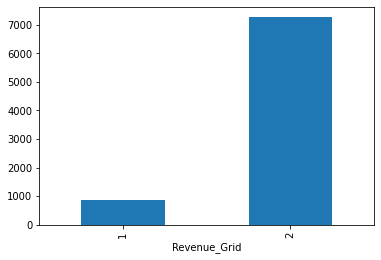

In [45]:
(data_Dropped.groupby(['Revenue_Grid'])['Revenue_Grid'].count()).plot(kind='bar')

In [46]:
print(data_Dropped.Revenue_Grid.unique());

[2 1]


In [47]:
print(data_Dropped.family_income.unique());

[35000 21250 23750 28750 18750 26250  4000 13750 16250  6000 11250  9000
     0]


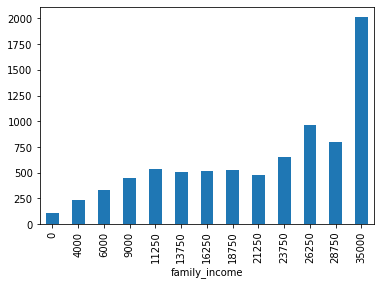

In [48]:
(data_Dropped.groupby(['family_income'])['Revenue_Grid'].count()).plot(kind='bar')

In [49]:
print(data_Dropped.gender.unique());

['Female' 'Male' 'Unknown']


In [50]:
print(data_Dropped.groupby(['gender'])['age_band'].count())

gender
Female     6106
Male       1987
Unknown      31
Name: age_band, dtype: int64


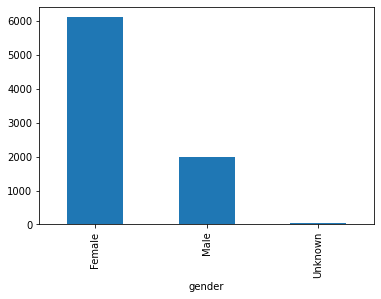

In [51]:
(data_Dropped.groupby(['gender'])['Revenue_Grid'].count()).plot(kind='bar')

In [52]:
print(data_Dropped.age_band.unique());

[35 50 40 60 65 70 45 55 30 25 21]


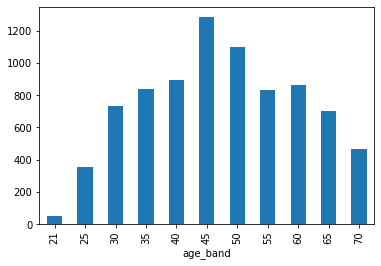

In [53]:
(data_Dropped.groupby(['age_band'])['Revenue_Grid'].count()).plot(kind='bar')

In [54]:
data_Dropped.columns

Index(['age_band', 'family_income', 'Average_Credit_Card_Transaction',
       'Balance_Transfer', 'Term_Deposit', 'Average_A/C_Balance',
       'Online_Purchase_Amount', 'gender', 'Portfolio_Balance', 'Revenue_Grid',
       'investment', 'insurance', 'loan'],
      dtype='object')

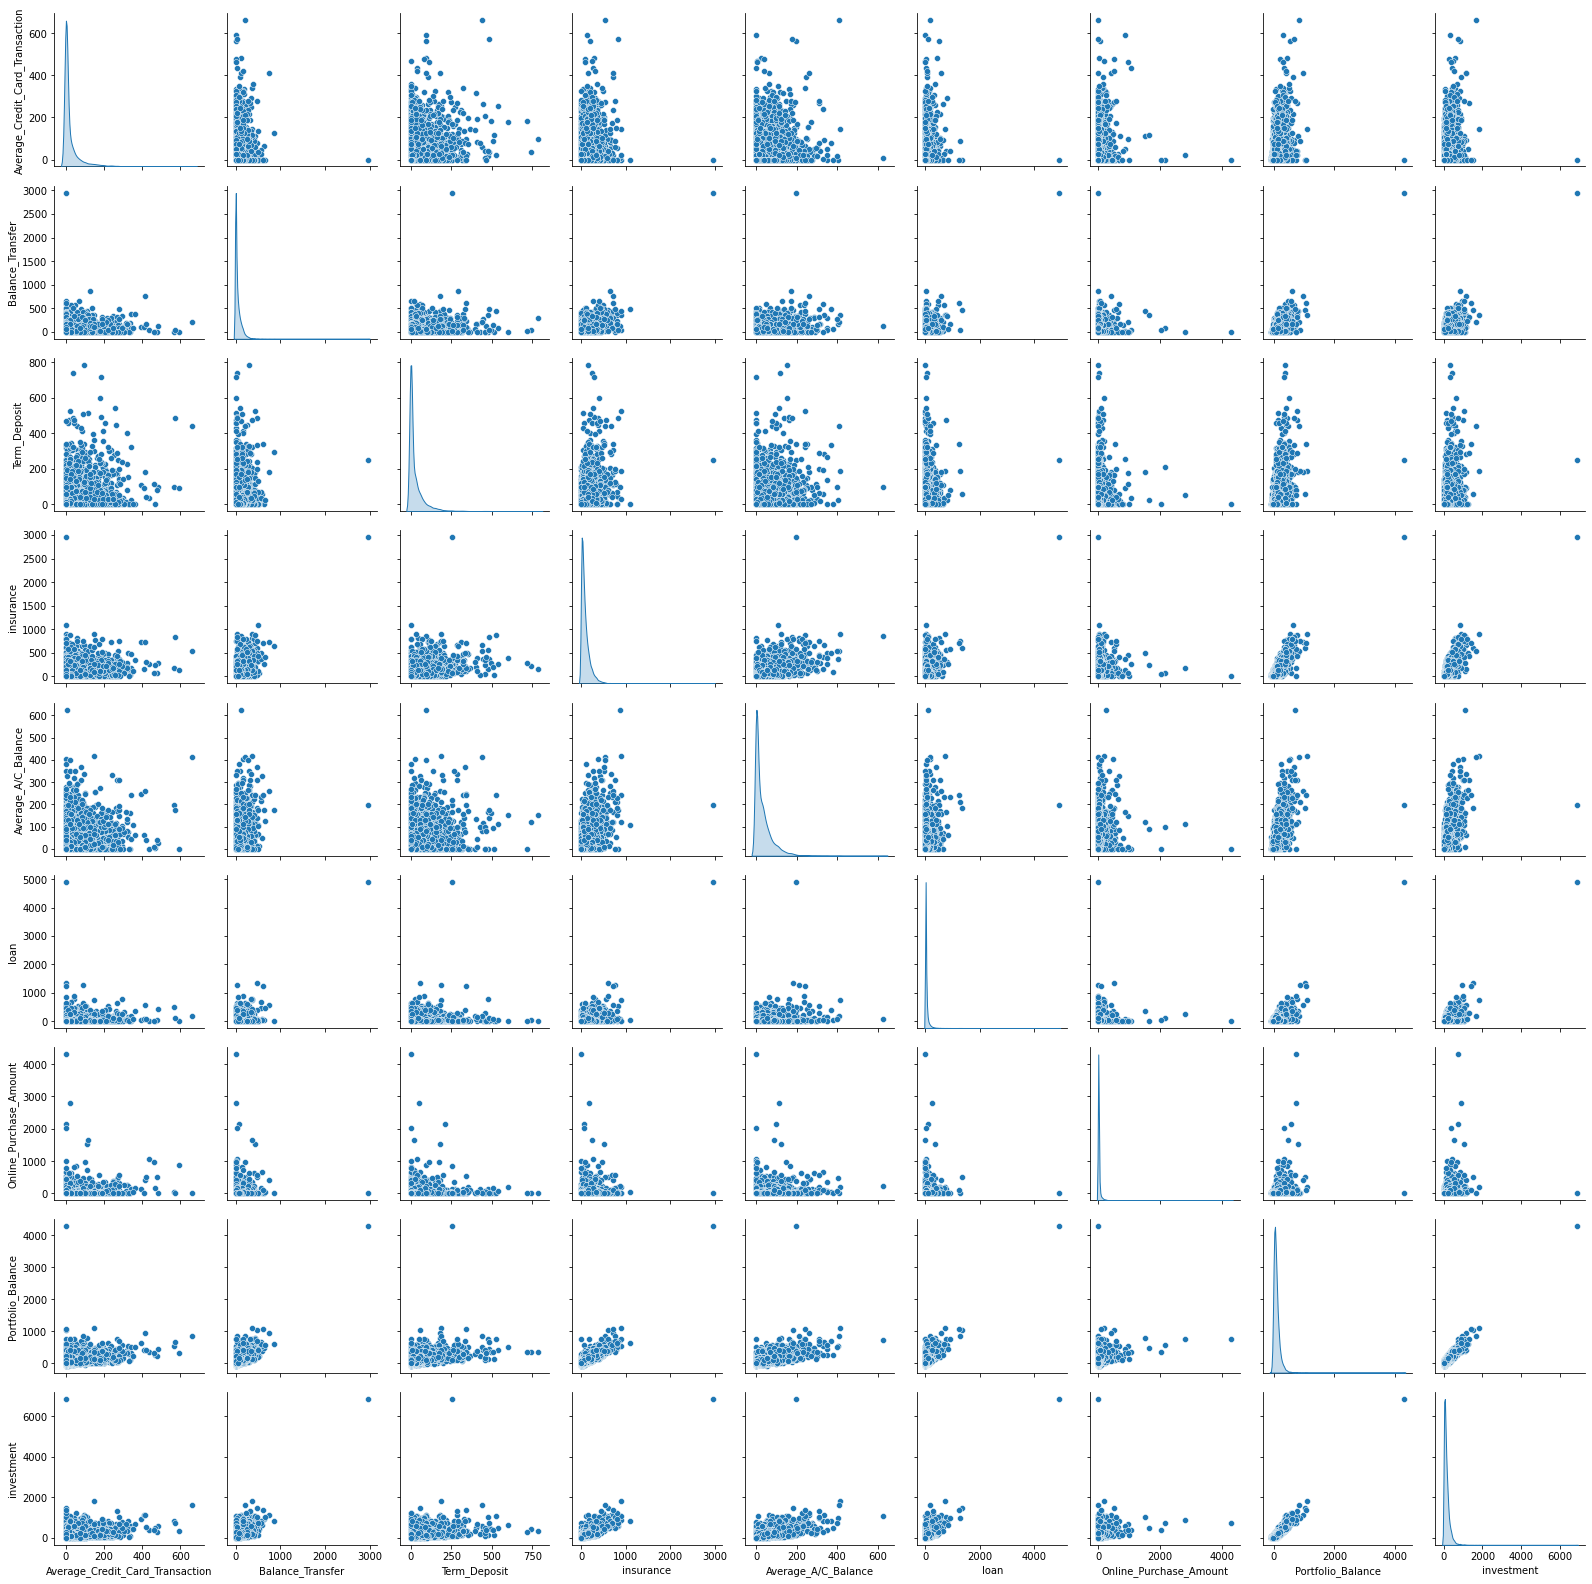

In [55]:
subset = data_Dropped[['Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit','insurance', 'Average_A/C_Balance',
                        'loan', 'Online_Purchase_Amount', 'Portfolio_Balance', 'investment']]

# Using magic of pandas area() function for plotting stack area plot
sns.pairplot(data=subset, size=2.5, diag_kind='kde')

# Display the output by rendering visual on the screen
plt.show()

# **Creating dummy variables for our categorical variables**

In [56]:
cat_cols = ['gender']

In [57]:
data_with_dummies = pd.get_dummies(data_Dropped, columns=cat_cols, drop_first=True)

In [58]:
data_with_dummies.head()

,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Online_Purchase_Amount,Portfolio_Balance,Revenue_Grid,investment,insurance,loan,gender_Male,gender_Unknown
0,35,35000,26.98,29.99,312.25,108.85,7.68,360.37,2,512.69,388.51,230.87,0,0
1,50,35000,35.98,74.48,0.00,48.45,18.99,89.22,2,87.42,110.95,15.99,0,0
2,40,21250,0.00,24.46,0.00,0.00,0.00,14.50,2,25.61,18.44,0.02,0,0
3,35,23750,44.99,0.00,0.00,0.00,0.00,68.98,2,20.00,29.99,0.00,0,0
4,60,35000,0.00,0.00,0.00,0.00,0.00,1.88,2,13.30,0.00,0.00,0,0


Text(0.5, 1.0, 'Correlation between features')

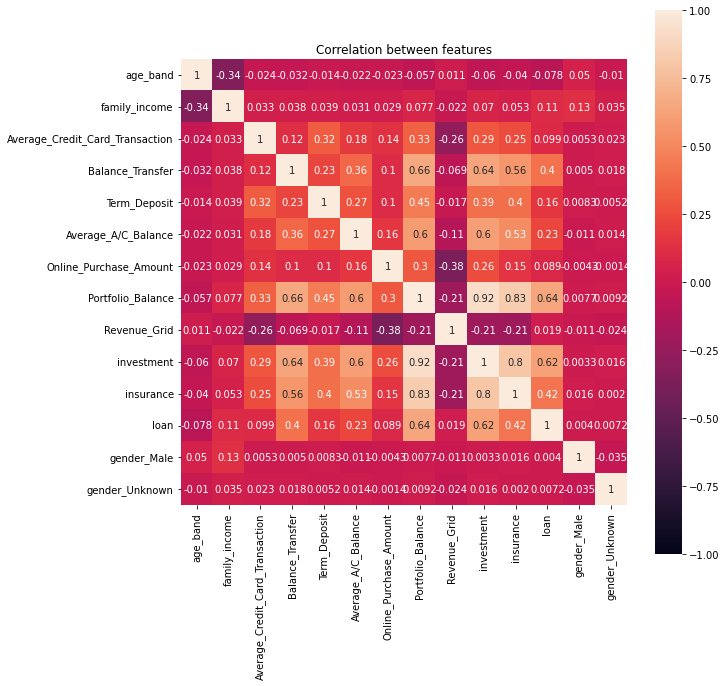

In [59]:
corr = data_with_dummies.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

In [60]:
data_with_dummies.columns

Index(['age_band', 'family_income', 'Average_Credit_Card_Transaction',
       'Balance_Transfer', 'Term_Deposit', 'Average_A/C_Balance',
       'Online_Purchase_Amount', 'Portfolio_Balance', 'Revenue_Grid',
       'investment', 'insurance', 'loan', 'gender_Male', 'gender_Unknown'],
      dtype='object')

# **Logistic Regression**

In [61]:
features = ['age_band',	'family_income','Average_Credit_Card_Transaction',
       'Balance_Transfer', 'Term_Deposit', 'Average_A/C_Balance',
       'Online_Purchase_Amount', 'Portfolio_Balance', 'investment', 'insurance', 'loan', 'gender_Male', 'gender_Unknown']
#features = ['age_band',	'family_income',	'Average_Credit_Card_Transaction',	'Balance_Transfer',	'Term_Deposit',	'Average_A/C_Balance',	'Online_Purchase_Amount',	'Portfolio_Balance','investment',	'insurance','loan']
target = ['Revenue_Grid']

In [62]:
X = data_with_dummies[features]
y = data_with_dummies[target]

In [63]:
print(X.shape)
print(y.shape)

(8124, 13)
(8124, 1)


In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

In [65]:
y_pred_train = logreg.predict(X)

In [66]:
y_pred_train

array([2, 2, 2, ..., 2, 2, 2])

In [67]:
from sklearn.metrics import classification_report                   # To generate classification report


train_report = classification_report(y, y_pred_train)
#test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)

                    Training Report          
              precision    recall  f1-score   support

           1       0.81      0.53      0.64       860
           2       0.95      0.99      0.97      7264

    accuracy                           0.94      8124
   macro avg       0.88      0.76      0.80      8124
weighted avg       0.93      0.94      0.93      8124



 with data_Dropped
 
                    Training Report          
              precision    recall  f1-score   support

           1       0.81      0.55      0.66       860
           2       0.95      0.98      0.97      7264

    accuracy                           0.94      8124
   macro avg       0.88      0.77      0.81      8124

weighted avg       0.93      0.94      0.93      8124


In [68]:
df=pd.DataFrame(y_pred_train,columns=['col1'])
df.head()
df['col1'].value_counts()

2    7565
1     559
Name: col1, dtype: int64

In [69]:
df.to_csv('/content/sample_data/Train_Pred.csv')

# **Preparing Test Data**

In [70]:
data_Test = pd.read_csv('/content/sample_data/existing_base_test.csv');

In [71]:
data_Dropped_test=data_Test.copy()
data_Dropped_test['investment'] = data_Dropped_test['Investment_in_Mutual_Fund'] + data_Dropped_test['Investment_Tax_Saving_Bond'] + data_Dropped_test['Investment_in_Commudity'] + data_Dropped_test['Investment_in_Equity'] + data_Dropped_test['Investment_in_Derivative']
data_Dropped_test['insurance']=data_Dropped_test['Life_Insurance'] + data_Dropped_test['Medical_Insurance']
data_Dropped_test['loan']=data_Dropped_test['Personal_Loan'] + data_Dropped_test['Home_Loan']
drop_cols = ['REF_NO','children','status','occupation', 'self_employed','self_employed_partner','Life_Insurance','Medical_Insurance','Personal_Loan','Home_Loan','occupation_partner', 'home_status','year_last_moved','TVarea', 'post_code', 'post_area', 'region','Investment_in_Mutual_Fund','Investment_Tax_Saving_Bond','Investment_in_Commudity','Investment_in_Equity','Investment_in_Derivative']
data_Dropped_test= data_Dropped_test.drop(drop_cols, axis = 1)
data_Dropped_test.head(5)

,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Online_Purchase_Amount,gender,Portfolio_Balance,investment,insurance,loan
0,71+,"<12,500, >=10,000",41.98,55.47,24.99,44.47,0.00,Male,83.05,129.92,79.96,0.00
1,31-35,">=35,000",0.00,0.00,0.00,29.49,57.46,Male,235.29,343.15,135.33,183.78
2,71+,"<15,000, >=12,500",0.00,154.47,0.00,87.83,0.00,Female,98.38,228.75,67.47,0.00
3,22-25,"<17,500, >=15,000",18.98,60.98,0.00,0.00,0.00,Female,86.32,120.35,27.98,102.43
4,65-70,"< 4,000",0.00,144.90,0.00,32.98,5.45,Female,102.99,143.72,123.38,17.93


In [72]:
data_Dropped_test['family_income']=data_Dropped_test['family_income'].replace('Unknown', '>0')
data_Dropped_test['family_income']=data_Dropped_test['family_income'].replace('< 4,000', '<4,000')
data_Dropped_test['family_income']=data_Dropped_test['family_income'].replace('<10,000, >= 8,000', '<10,000, >=8,000')
data_Dropped_test['family_income']=data_Dropped_test['family_income'].replace('< 8,000, >= 4,000', '<8,000, >=4,000')

In [73]:
data_Dropped_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         2031 non-null   object 
 1   family_income                    2031 non-null   object 
 2   Average_Credit_Card_Transaction  2031 non-null   float64
 3   Balance_Transfer                 2031 non-null   float64
 4   Term_Deposit                     2031 non-null   float64
 5   Average_A/C_Balance              2031 non-null   float64
 6   Online_Purchase_Amount           2031 non-null   float64
 7   gender                           2031 non-null   object 
 8   Portfolio_Balance                2031 non-null   float64
 9   investment                       2031 non-null   float64
 10  insurance                        2031 non-null   float64
 11  loan                             2031 non-null   float64
dtypes: float64(9), objec

In [74]:
family_income_values_test=data_Dropped_test['family_income'].tolist()
print(family_income_values_test)

['<12,500, >=10,000', '>=35,000', '<15,000, >=12,500', '<17,500, >=15,000', '<4,000', '<22,500, >=20,000', '<20,000, >=17,500', '>=35,000', '>=35,000', '<17,500, >=15,000', '<10,000, >=8,000', '>0', '<15,000, >=12,500', '<17,500, >=15,000', '<10,000, >=8,000', '<30,000, >=27,500', '<30,000, >=27,500', '<20,000, >=17,500', '<20,000, >=17,500', '>=35,000', '>=35,000', '>=35,000', '<8,000, >=4,000', '<22,500, >=20,000', '>=35,000', '<20,000, >=17,500', '<20,000, >=17,500', '<8,000, >=4,000', '<12,500, >=10,000', '<17,500, >=15,000', '<27,500, >=25,000', '<20,000, >=17,500', '<27,500, >=25,000', '<30,000, >=27,500', '>=35,000', '<20,000, >=17,500', '<8,000, >=4,000', '<22,500, >=20,000', '<25,000, >=22,500', '<25,000, >=22,500', '<22,500, >=20,000', '<20,000, >=17,500', '<25,000, >=22,500', '>=35,000', '<15,000, >=12,500', '<8,000, >=4,000', '<12,500, >=10,000', '>=35,000', '>=35,000', '<17,500, >=15,000', '<30,000, >=27,500', '<25,000, >=22,500', '<30,000, >=27,500', '>=35,000', '<8,000, 

In [75]:

import string
data1 = family_income_values_test

income_mean_test=data_Dropped_test.copy()
income_mean_test = pd.DataFrame(data1, columns = ['family_income'])

# Removing punctuation from family_income column
income_mean_test['family_income'] = income_mean_test['family_income'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Splitting ranges to two columns A and B
income_mean_test[['A', 'B']] = income_mean_test['family_income'].str.split(' ', 1, expand=True)

print(income_mean_test)
income_mean_test.info()
# Converting cols A and B to float


income_mean_test[['A', 'B']] = income_mean_test[['A', 'B']].apply(pd.to_numeric)

# Creating mean column from A and B
income_mean_test['mean'] = income_mean_test[['A', 'B']].mean(axis=1)

print(income_mean_test)



     family_income      A      B
0      12500 10000  12500  10000
1            35000  35000   None
2      15000 12500  15000  12500
3      17500 15000  17500  15000
4             4000   4000   None
...            ...    ...    ...
2026   27500 25000  27500  25000
2027    10000 8000  10000   8000
2028   25000 22500  25000  22500
2029             0      0   None
2030   25000 22500  25000  22500

[2031 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   family_income  2031 non-null   object
 1   A              2031 non-null   object
 2   B              1463 non-null   object
dtypes: object(3)
memory usage: 47.7+ KB
     family_income      A        B     mean
0      12500 10000  12500  10000.0  11250.0
1            35000  35000      NaN  35000.0
2      15000 12500  15000  12500.0  13750.0
3      17500 15000  17500  15000.0  16250

In [76]:
#####
data_Dropped_test['family_income']=income_mean_test['mean']

In [77]:
data_Dropped_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         2031 non-null   object 
 1   family_income                    2031 non-null   float64
 2   Average_Credit_Card_Transaction  2031 non-null   float64
 3   Balance_Transfer                 2031 non-null   float64
 4   Term_Deposit                     2031 non-null   float64
 5   Average_A/C_Balance              2031 non-null   float64
 6   Online_Purchase_Amount           2031 non-null   float64
 7   gender                           2031 non-null   object 
 8   Portfolio_Balance                2031 non-null   float64
 9   investment                       2031 non-null   float64
 10  insurance                        2031 non-null   float64
 11  loan                             2031 non-null   float64
dtypes: float64(10), obje

In [78]:
data_Dropped_test.head()

,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Online_Purchase_Amount,gender,Portfolio_Balance,investment,insurance,loan
0,71+,11250.0,41.98,55.47,24.99,44.47,0.00,Male,83.05,129.92,79.96,0.00
1,31-35,35000.0,0.00,0.00,0.00,29.49,57.46,Male,235.29,343.15,135.33,183.78
2,71+,13750.0,0.00,154.47,0.00,87.83,0.00,Female,98.38,228.75,67.47,0.00
3,22-25,16250.0,18.98,60.98,0.00,0.00,0.00,Female,86.32,120.35,27.98,102.43
4,65-70,4000.0,0.00,144.90,0.00,32.98,5.45,Female,102.99,143.72,123.38,17.93


In [79]:

data_Dropped_test['A'], data_Dropped_test['B']=data_Dropped_test['age_band'].str.split('-', 1).str
data_Dropped_test.head(5)

,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Online_Purchase_Amount,gender,Portfolio_Balance,investment,insurance,loan,A,B
0,71+,11250.0,41.98,55.47,24.99,44.47,0.00,Male,83.05,129.92,79.96,0.00,71+,NaN
1,31-35,35000.0,0.00,0.00,0.00,29.49,57.46,Male,235.29,343.15,135.33,183.78,31,35
2,71+,13750.0,0.00,154.47,0.00,87.83,0.00,Female,98.38,228.75,67.47,0.00,71+,NaN
3,22-25,16250.0,18.98,60.98,0.00,0.00,0.00,Female,86.32,120.35,27.98,102.43,22,25
4,65-70,4000.0,0.00,144.90,0.00,32.98,5.45,Female,102.99,143.72,123.38,17.93,65,70


In [80]:
data_Dropped_test['A']=data_Dropped_test['A'].replace('71+', '71')
data_Dropped_test['B']=data_Dropped_test['B'].replace('71+', '71')
data_Dropped_test['A']=data_Dropped_test['A'].replace('Unknown', '0')
data_Dropped_test['B']=data_Dropped_test['B'].replace('Unknown', '0')
data_Dropped_test['B'].fillna(0, inplace=True)
data_Dropped_test['age_band']=data_Dropped_test['age_band'].replace('71+', '71')
data_Dropped_test['age_band']=data_Dropped_test['age_band'].replace('Unknown', '0')

In [81]:
data_Dropped_test.head(5)

,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Online_Purchase_Amount,gender,Portfolio_Balance,investment,insurance,loan,A,B
0,71,11250.0,41.98,55.47,24.99,44.47,0.00,Male,83.05,129.92,79.96,0.00,71,0
1,31-35,35000.0,0.00,0.00,0.00,29.49,57.46,Male,235.29,343.15,135.33,183.78,31,35
2,71,13750.0,0.00,154.47,0.00,87.83,0.00,Female,98.38,228.75,67.47,0.00,71,0
3,22-25,16250.0,18.98,60.98,0.00,0.00,0.00,Female,86.32,120.35,27.98,102.43,22,25
4,65-70,4000.0,0.00,144.90,0.00,32.98,5.45,Female,102.99,143.72,123.38,17.93,65,70


In [82]:
print(data_Dropped_test['B'].astype(int)!=0)

0       False
1        True
2       False
3        True
4        True
        ...  
2026     True
2027     True
2028     True
2029    False
2030     True
Name: B, Length: 2031, dtype: bool


In [83]:
#if((data_Dropped_test['B'].astype(int))==0):
data_Dropped_test['age_band']=((data_Dropped_test['B'].astype(int)+data_Dropped_test['B'].astype(int))/2).astype(int)
column_means = data_Dropped_test['age_band'].mean()
data_Dropped_test['age_band'] = data_Dropped_test['age_band'].replace(0,column_means)
data_Dropped_test['age_band'] =data_Dropped_test['age_band'].astype(int)
data_Dropped_test['family_income'] =data_Dropped_test['family_income'].astype(int)

In [84]:
drop_cols = ['A',	'B']
data_Dropped_test= data_Dropped_test.drop(drop_cols, axis = 1)
data_Dropped_test.head(5)

,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Online_Purchase_Amount,gender,Portfolio_Balance,investment,insurance,loan
0,45,11250,41.98,55.47,24.99,44.47,0.00,Male,83.05,129.92,79.96,0.00
1,35,35000,0.00,0.00,0.00,29.49,57.46,Male,235.29,343.15,135.33,183.78
2,45,13750,0.00,154.47,0.00,87.83,0.00,Female,98.38,228.75,67.47,0.00
3,25,16250,18.98,60.98,0.00,0.00,0.00,Female,86.32,120.35,27.98,102.43
4,70,4000,0.00,144.90,0.00,32.98,5.45,Female,102.99,143.72,123.38,17.93


In [85]:
data_Dropped_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         2031 non-null   int64  
 1   family_income                    2031 non-null   int64  
 2   Average_Credit_Card_Transaction  2031 non-null   float64
 3   Balance_Transfer                 2031 non-null   float64
 4   Term_Deposit                     2031 non-null   float64
 5   Average_A/C_Balance              2031 non-null   float64
 6   Online_Purchase_Amount           2031 non-null   float64
 7   gender                           2031 non-null   object 
 8   Portfolio_Balance                2031 non-null   float64
 9   investment                       2031 non-null   float64
 10  insurance                        2031 non-null   float64
 11  loan                             2031 non-null   float64
dtypes: float64(9), int64

In [86]:
cat_cols = ['gender']
data_with_dummies_test = pd.get_dummies(data_Dropped_test, columns=cat_cols, drop_first=True)
data_with_dummies_test.head()
data_with_dummies_test.columns

Index(['age_band', 'family_income', 'Average_Credit_Card_Transaction',
       'Balance_Transfer', 'Term_Deposit', 'Average_A/C_Balance',
       'Online_Purchase_Amount', 'Portfolio_Balance', 'investment',
       'insurance', 'loan', 'gender_Male', 'gender_Unknown'],
      dtype='object')

In [87]:
data_with_dummies_test.head(5)

,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Online_Purchase_Amount,Portfolio_Balance,investment,insurance,loan,gender_Male,gender_Unknown
0,45,11250,41.98,55.47,24.99,44.47,0.00,83.05,129.92,79.96,0.00,1,0
1,35,35000,0.00,0.00,0.00,29.49,57.46,235.29,343.15,135.33,183.78,1,0
2,45,13750,0.00,154.47,0.00,87.83,0.00,98.38,228.75,67.47,0.00,0,0
3,25,16250,18.98,60.98,0.00,0.00,0.00,86.32,120.35,27.98,102.43,0,0
4,70,4000,0.00,144.90,0.00,32.98,5.45,102.99,143.72,123.38,17.93,0,0


In [88]:
features_test = ['age_band',	'family_income','Average_Credit_Card_Transaction',
       'Balance_Transfer', 'Term_Deposit', 'Average_A/C_Balance',
       'Online_Purchase_Amount', 'Portfolio_Balance', 'investment', 'insurance', 'loan', 'gender_Male', 'gender_Unknown']

target_test = ['Revenue_Grid']

In [89]:
X_test = data_with_dummies_test[features_test]
#y_test = data_with_dummies_test[target_test]

In [90]:
target_test = logreg.predict(X_test)
data_with_dummies_test['Pred']=target_test



In [91]:
data_with_dummies_test.head()

,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Online_Purchase_Amount,Portfolio_Balance,investment,insurance,loan,gender_Male,gender_Unknown,Pred
0,45,11250,41.98,55.47,24.99,44.47,0.00,83.05,129.92,79.96,0.00,1,0,2
1,35,35000,0.00,0.00,0.00,29.49,57.46,235.29,343.15,135.33,183.78,1,0,2
2,45,13750,0.00,154.47,0.00,87.83,0.00,98.38,228.75,67.47,0.00,0,0,2
3,25,16250,18.98,60.98,0.00,0.00,0.00,86.32,120.35,27.98,102.43,0,0,2
4,70,4000,0.00,144.90,0.00,32.98,5.45,102.99,143.72,123.38,17.93,0,0,2


In [92]:
X_test.shape

(2031, 13)

In [93]:
data_with_dummies_test['Pred'].value_counts()
#data_Dropped['family_income'].value_counts()

2    1904
1     127
Name: Pred, dtype: int64

In [96]:
data_with_dummies_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         2031 non-null   int64  
 1   family_income                    2031 non-null   int64  
 2   Average_Credit_Card_Transaction  2031 non-null   float64
 3   Balance_Transfer                 2031 non-null   float64
 4   Term_Deposit                     2031 non-null   float64
 5   Average_A/C_Balance              2031 non-null   float64
 6   Online_Purchase_Amount           2031 non-null   float64
 7   Portfolio_Balance                2031 non-null   float64
 8   investment                       2031 non-null   float64
 9   insurance                        2031 non-null   float64
 10  loan                             2031 non-null   float64
 11  gender_Male                      2031 non-null   uint8  
 12  gender_Unknown      

In [97]:
target_test= pd.DataFrame(target_test)

target_test.head(2)

,0
0,2
1,2


In [99]:
op = pd.DataFrame(data_Test["REF_NO"])

out = [op,target_test]

op = pd.concat(out, axis =1)

op.set_index('REF_NO')   

op[op.columns[1]] = op[op.columns[1]].astype("Int64")


op.head(2)

,REF_NO,0
0,697,2
1,7897,2


In [100]:
print(op.to_csv('/content/sample_data/submission.csv', index=False, header=False))

None


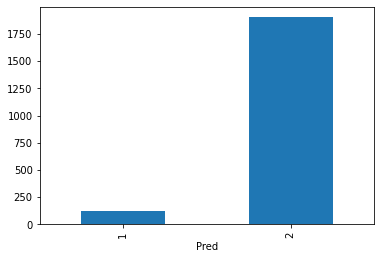

In [ ]:
(data_with_dummies_test.groupby(['Pred'])['Pred'].count()).plot(kind='bar')

In [ ]:
from sklearn.metrics import classification_report                   # To generate classification report


train_report = classification_report(y, y_pred_train)
#test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)
